In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree 
df=pd.read_csv('C:/Users/PC/Downloads/pandas notebooks/Data sets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
inputs=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [4]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [7]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
inputs['Pclass_n']=LabelEncoder().fit_transform(inputs['Pclass'])
inputs['Sex_n']=LabelEncoder().fit_transform(inputs['Sex'])
inputs['Age_n']=LabelEncoder().fit_transform(inputs['Age'])
inputs['Fare_n']=LabelEncoder().fit_transform(inputs['Fare'])

In [10]:
inputs

,Pclass,Sex,Age,Fare,Pclass_n,Sex_n,Age_n,Fare_n
0,3,male,22.000000,7.2500,2,1,28,18
1,1,female,38.000000,71.2833,0,0,52,207
2,3,female,26.000000,7.9250,2,0,34,41
3,1,female,35.000000,53.1000,0,0,48,189
4,3,male,35.000000,8.0500,2,1,48,43
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,13.0000,1,1,35,85
887,1,female,19.000000,30.0000,0,0,24,153
888,3,female,29.699118,23.4500,2,0,39,131
889,1,male,26.000000,30.0000,0,1,34,153


In [11]:
inputs_n=inputs.drop(['Pclass','Sex','Age','Fare'],axis='columns')

In [12]:
inputs_n

,Pclass_n,Sex_n,Age_n,Fare_n
0,2,1,28,18
1,0,0,52,207
2,2,0,34,41
3,0,0,48,189
4,2,1,48,43
...,...,...,...,...
886,1,1,35,85
887,0,0,24,153
888,2,0,39,131
889,0,1,34,153


In [13]:
from sklearn import tree

In [14]:
model=tree.DecisionTreeClassifier()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.2)

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
model.score(X_test,y_test)

0.7430167597765364

In [19]:
model.predict([[2,1,28,18]])

array([0], dtype=int64)

In [20]:
clf=model.fit(X_test,y_test)

[Text(337.40490522540983, 527.6117647058824, 'X[1] <= 0.5\ngini = 0.481\nsamples = 179\nvalue = [107, 72]'),
 Text(92.6188524590164, 495.63529411764705, 'X[0] <= 1.5\ngini = 0.397\nsamples = 66\nvalue = [18, 48]'),
 Text(54.885245901639344, 463.6588235294118, 'X[3] <= 111.5\ngini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 Text(41.16393442622951, 431.6823529411765, 'X[2] <= 33.0\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(27.442622950819672, 399.7058823529412, 'X[2] <= 27.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(13.721311475409836, 367.7294117647059, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(41.16393442622951, 367.7294117647059, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(54.885245901639344, 399.7058823529412, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(68.60655737704919, 431.6823529411765, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(130.35245901639345, 463.6588235294118, 'X[3] <= 46.0\ngini = 0.498\nsamples = 32\nvalue = [17, 15]'),
 Tex

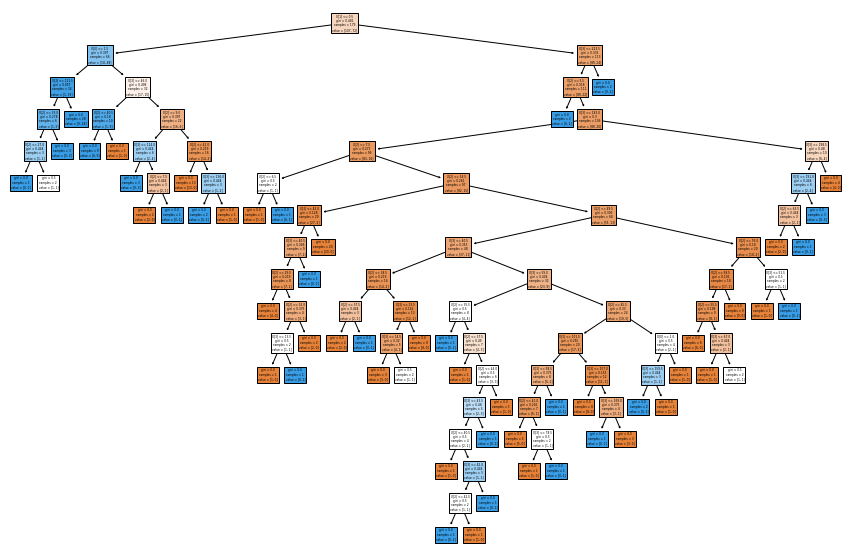

In [21]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)